Họ và tên : Bùi Minh Tú

MSSV: 19146295

Lớp AI sáng thứ 4

BT: Nhận dạng 11 giá trị tiền

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.models import Sequential

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
def loadData():
    file = open('/content/drive/MyDrive/money.data','rb')
    (images, labels) = pickle.load(file)
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [126]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(2617, 128, 128, 3)
(2617, 11)


In [127]:
model = Sequential()

In [128]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [129]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [130]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=70, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)

Epoch 1/70
33/33 [==============================] - 12s 356ms/step - loss: 2.9475 - accuracy: 0.1839 - val_loss: 2.3564 - val_accuracy: 0.2023
Epoch 2/70
33/33 [==============================] - 11s 341ms/step - loss: 2.1629 - accuracy: 0.2207 - val_loss: 2.0878 - val_accuracy: 0.2481
Epoch 3/70
33/33 [==============================] - 11s 340ms/step - loss: 1.9781 - accuracy: 0.2891 - val_loss: 1.8229 - val_accuracy: 0.3321
Epoch 4/70
33/33 [==============================] - 11s 343ms/step - loss: 1.9077 - accuracy: 0.3373 - val_loss: 2.0604 - val_accuracy: 0.2214
Epoch 5/70
33/33 [==============================] - 11s 339ms/step - loss: 1.8144 - accuracy: 0.3674 - val_loss: 1.7472 - val_accuracy: 0.4275
Epoch 6/70
33/33 [==============================] - 12s 353ms/step - loss: 1.5267 - accuracy: 0.4720 - val_loss: 1.4312 - val_accuracy: 0.5000
Epoch 7/70
33/33 [==============================] - 11s 343ms/step - loss: 1.5146 - accuracy: 0.4763 - val_loss: 1.2229 - val_accuracy: 0.5992

In [131]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 17.0084
Test accuracy 0.9427


In [132]:
model.save('Final.h5')

In [133]:
from keras.models import load_model
model5=load_model('Final.h5')

In [134]:
class_name = ['200đ','500đ','1000đ','2000đ','5000đ','10000đ','20000đ','50000đ','100000đ','200000','500000đ']

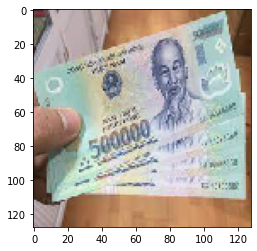

In [147]:
img = load_img('/content/500k.jpg',target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)

In [148]:
img=img.reshape(1,128,128,3)
class_name[np.argmax(model5.predict(img),axis=1)[0]]

'500000đ'